CNN model to classify a given image of handwritten digit into one of the 10 classes representing integer values from 0 to 9.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

MNIST data is a database of handwritten digits from 0 to 9. The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Create an ANN model to identify the digit from the handwritten images.

In [2]:
from keras.datasets import mnist
# alternative syntax: df = keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train_full[6]

In [ ]:
plt.imshow(x_train_full[6])

In [3]:
print(x_train_full.shape,"\n",y_train_full.shape,"\n",x_test.shape,"\n",y_test.shape)

(60000, 28, 28) 
 (60000,) 
 (10000, 28, 28) 
 (10000,)


## Data Reshape
for CNN model

In [3]:
x_train_full = x_train_full.reshape((60000,28,28,1)) # 1 stands for channel.
x_test = x_test.reshape((10000,28,28,1))

## Data Normalisation

In [4]:
x_train_norm = x_train_full/255.0
x_test_norm = x_test/255.0

## Train-Val-Test Split
validation set of 6000 images.

In [5]:
x_val, x_train = x_train_norm[:6000], x_train_norm[6000:]
y_val, y_train = y_train_full[:6000], y_train_full[6000:]
x_test = x_test_norm

### to delete the previous model

In [17]:
del model_A
keras.backend.clear_session()

## Model Architecture

Random is to have the same output each time I run the code or to have the same output on every machine.

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', 
                             activation='relu', input_shape=(28,28,1)))
model_A.add(keras.layers.MaxPooling2D((2,2)))

model_A.add(keras.layers.Flatten())
model_A.add(keras.layers.Dense(200, activation='relu'))
model_A.add(keras.layers.Dense(100, activation='relu'))
model_A.add(keras.layers.Dense(10, activation='softmax'))

In [20]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='valid', 
                             activation='relu', input_shape=(28,28,1)))
model_B.add(keras.layers.MaxPooling2D((2,2)))

model_B.add(keras.layers.Flatten())
model_B.add(keras.layers.Dense(200, activation='relu'))
model_B.add(keras.layers.Dense(100, activation='relu'))
model_B.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [22]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               2163400   
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

## Compile

In [23]:
model_A.compile(optimizer = "sgd",loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])
model_B.compile(optimizer = "sgd",loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

## Early Stopping & Callback 

In [25]:
checkpoint_cb_A = keras.callbacks.ModelCheckpoint("CNN_Digits_model_A.h5", save_best_only=True)
checkpoint_cb_B = keras.callbacks.ModelCheckpoint("CNN_Digits_model_B.h5", save_best_only=True)
early_stopping_cb_A = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
early_stopping_cb_B = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

## Train

In [27]:
history_A = model_A.fit(x_train, y_train, epochs=60, batch_size=64, 
                        validation_data=(x_val, y_val),\
                        callbacks = [checkpoint_cb_A, early_stopping_cb_A])

Epoch 1/60
844/844 [==============================] - 22s 26ms/step - loss: 0.6447 - accuracy: 0.8314 - val_loss: 0.2749 - val_accuracy: 0.9217
Epoch 2/60
  4/844 [..............................] - ETA: 17s - loss: 0.3155 - accuracy: 0.9062

C:\Users\geetika singh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


844/844 [==============================] - 21s 24ms/step - loss: 0.2616 - accuracy: 0.9222 - val_loss: 0.2112 - val_accuracy: 0.9395
Epoch 3/60
844/844 [==============================] - 22s 26ms/step - loss: 0.2047 - accuracy: 0.9388 - val_loss: 0.1726 - val_accuracy: 0.9515
Epoch 4/60
844/844 [==============================] - 27s 32ms/step - loss: 0.1705 - accuracy: 0.9499 - val_loss: 0.1430 - val_accuracy: 0.9607
Epoch 5/60
844/844 [==============================] - 29s 35ms/step - loss: 0.1466 - accuracy: 0.9569 - val_loss: 0.1331 - val_accuracy: 0.9610
Epoch 6/60
844/844 [==============================] - 29s 34ms/step - loss: 0.1287 - accuracy: 0.9623 - val_loss: 0.1187 - val_accuracy: 0.9657
Epoch 7/60
844/844 [==============================] - 31s 37ms/step - loss: 0.1151 - accuracy: 0.9662 - val_loss: 0.1075 - val_accuracy: 0.9672
Epoch 8/60
844/844 [==============================] - 29s 34ms/step - loss: 0.1037 - accuracy: 0.9697 - val_loss: 0.1009 - val_accuracy: 0.9702
Epo

In [28]:
history_B = model_B.fit(x_train, y_train, epochs=60, batch_size=64, 
                        validation_data=(x_val, y_val),
                        callbacks = [checkpoint_cb_B, early_stopping_cb_B])

Epoch 1/60
844/844 [==============================] - 38s 45ms/step - loss: 0.6942 - accuracy: 0.8173 - val_loss: 0.2798 - val_accuracy: 0.9183
Epoch 2/60
844/844 [==============================] - 41s 48ms/step - loss: 0.2641 - accuracy: 0.9230 - val_loss: 0.2187 - val_accuracy: 0.9393
Epoch 3/60
844/844 [==============================] - 43s 51ms/step - loss: 0.2080 - accuracy: 0.9378 - val_loss: 0.1757 - val_accuracy: 0.9532
Epoch 4/60
844/844 [==============================] - 44s 52ms/step - loss: 0.1727 - accuracy: 0.9482 - val_loss: 0.1482 - val_accuracy: 0.9570
Epoch 5/60
844/844 [==============================] - 53s 62ms/step - loss: 0.1478 - accuracy: 0.9557 - val_loss: 0.1353 - val_accuracy: 0.9620
Epoch 6/60
844/844 [==============================] - 46s 54ms/step - loss: 0.1296 - accuracy: 0.9618 - val_loss: 0.1183 - val_accuracy: 0.9640
Epoch 7/60
844/844 [==============================] - 44s 53ms/step - loss: 0.1152 - accuracy: 0.9666 - val_loss: 0.1067 - val_accuracy:

### Plotting the lost & accuracy against each epoch

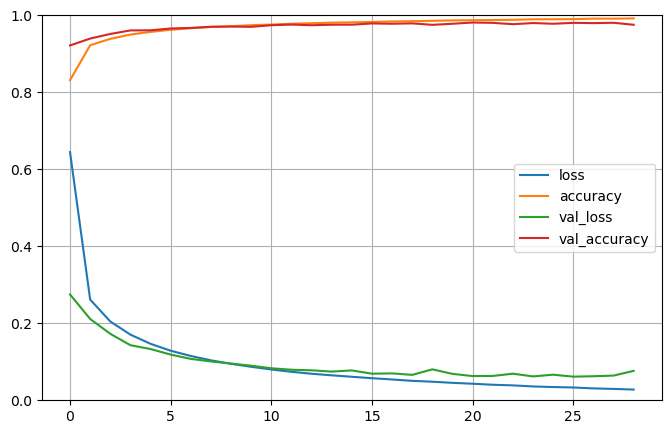

In [29]:
pd.DataFrame(history_A.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

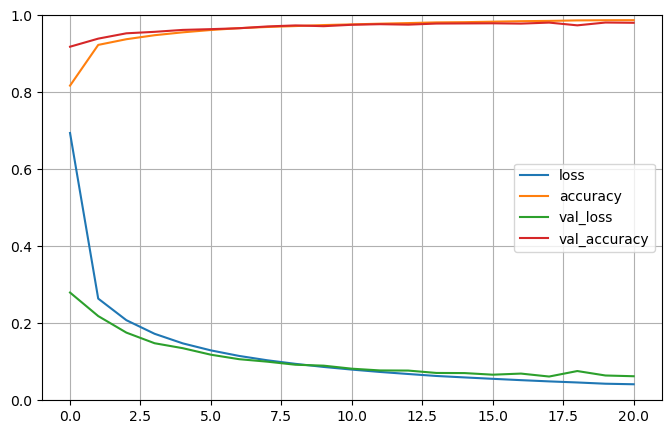

In [30]:
pd.DataFrame(history_B.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Load the best model & Evaluating model accuracy on test dataset

In [7]:
model_A = keras.models.load_model("CNN_Digits_model_A.h5")
model_A.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9808


[0.06021520495414734, 0.9807999730110168]

In [8]:
model_B = keras.models.load_model("CNN_Digits_model_B.h5")
model_B.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0678 - accuracy: 0.9785


[0.06777818500995636, 0.9785000085830688]

In [9]:
y_pred = np.argmax(model_A.predict(x_test[:5]),axis=1)
y_pred

1/1 [==============================] - 0s 158ms/step


array([7, 2, 1, 0, 4], dtype=int64)

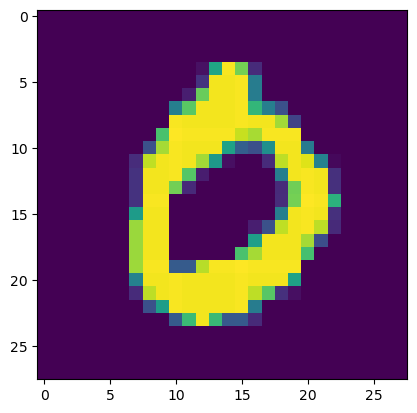

In [11]:
plt.imshow(x_test[3])